In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fs = 10
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["lines.linewidth"] = 0.5

def cm2inch(x,y): return [x/2.54, y/2.54]

In [3]:
D = pd.read_csv("../result/test3.csv")

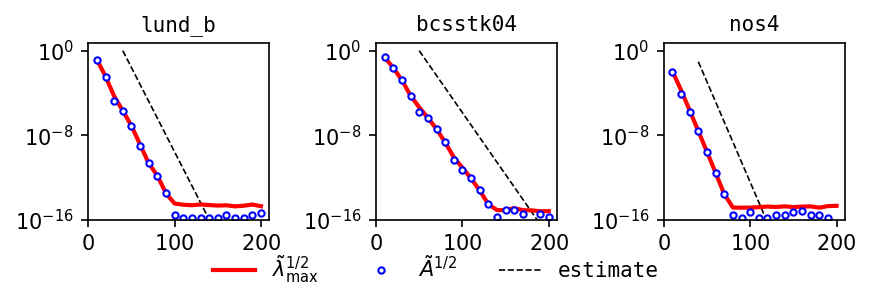

In [4]:
fig, ax = plt.subplots(1, 3, figsize=cm2inch(15, 5.2), dpi=150)

speeds = [0.36826219686664713, 0.2703417428478136, 0.48386832799296414]

for i, matname in enumerate(["lund_b", "bcsstk04", "nos4"]):
    m = D["m"]
    y1 = D["%s_A" % (matname)]
    y2 = D["%s_λ" % (matname)]
    
    p1, = ax[i].plot(m, y1, c="r", zorder=1, lw=2)
    p2, = ax[i].plot(m, y2, marker="o", lw=0, markeredgecolor="b", ms=3, markerfacecolor="w")
    
    s = speeds[i]
    x, y = [0,0], [0,0]
    if i == 0:
        x, y = [40,140], np.exp(-s*np.array([0,100]))
    elif i == 1:
        x, y = [50,200], np.exp(-s*np.array([0, 150]))
    elif i == 2:
        x, y = [40,145], np.exp(-s*np.array([5,100]))

    p3, = ax[i].plot(x, y, c="k",ls="--", zorder=0, lw=0.8)
    
    ax[i].set_yscale("log")
    ax[i].set_xticks([0,100,200])
    ax[i].set_xticklabels(["$0$","$100$","$200$"])
    ax[i].set_ylim(1e-16,5e0)
    ax[i].set_yticks([1e-16, 1e-8, 1e0])
    ax[i].set_yticklabels(["$10^{-16}$","$10^{-8}$", "$10^0$"])
    ax[i].set_title(matname, family="DejaVu Sans Mono")
    
fig.tight_layout()
fig.legend((p1, p2, p3), ["$\\tilde{\\lambda}_{\\mathrm{max}}^{1/2}$", "$\\tilde{A}^{1/2}$", "estimate"],
           loc=8, ncol=3, prop={"family":"DejaVu Sans Mono"}, frameon=False)

plt.subplots_adjust(bottom=0.26)
plt.savefig("fig-test3.pdf")
plt.show()